In [87]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.dates as mdates

plt.rc('font', family='Malgun Gothic')
%matplotlib inline

matplotlib.rcParams['axes.unicode_minus']=False

In [88]:
# 연도별 가격, 재고량, 수급안정화지수, 생산량, 소비량

In [119]:
price_daily = pd.read_excel('./니켈+가격_daily.xls', skiprows=9) # 가격데이터
price_monthly = pd.read_excel('./니켈+가격_monthly.xls',skiprows=9) # 가격데이터
price_stability = pd.read_excel('./니켈+수급안정화지수2024-06-10.xls',skiprows=2) # 수급안정화지수
price_output = pd.read_csv('./광종별 국가별 생산량_20240520.csv', encoding='cp949') #생산량
price_consumption = pd.read_csv('./광종별 소비현황_20231231.csv', encoding='cp949') # 소비량
price_export = pd.read_csv('./국가별 광종 수출입 현황_20231231.csv', encoding='cp949') # 국가별 수출입(2021년 데이터부터 있음)
price_export_in = pd.read_csv('./광종별 국내 수출입 현황_20231231.csv', encoding='cp949') # 국내 수출입(2021년 데이터부터 있음)


### 데이터 전처리
- 2017~2018

In [120]:
price_daily.head()

,Unnamed: 0,기준일,기준가격,등락가,등락비율,재고량,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,2014-06-10,18455,-305,-1.63,286626,NaN,NaN,NaN,NaN
1,NaN,2014-06-11,18350,-105,-0.57,286752,NaN,NaN,NaN,NaN
2,NaN,2014-06-12,18030,-320,-1.74,286482,NaN,NaN,NaN,NaN
3,NaN,2014-06-13,17950,-80,-0.44,286710,NaN,NaN,NaN,NaN
4,NaN,2014-06-16,18315,365,2.03,286668,NaN,NaN,NaN,NaN


In [121]:
# NaN값 삭제
price_daily = price_daily.drop(['Unnamed: 0','Unnamed: 6','Unnamed: 7','Unnamed: 8','Unnamed: 9'],axis=1)

In [122]:
# 기준일 2017~2018년도 맞추기

start_date = '2017-01-01'
end_date = '2018-12-31'
price_daily['기준일'] = pd.to_datetime(price_daily['기준일'])

price_daily = price_daily[(price_daily['기준일'] >= start_date) & (price_daily['기준일'] <= end_date)]
price_daily.reset_index(drop=True, inplace=True)

In [123]:
# NaN값 삭제
price_monthly = price_monthly.drop(['Unnamed: 0','Unnamed: 6','Unnamed: 7','Unnamed: 8','Unnamed: 9'],axis=1)

In [124]:
# 기준일 2017~2018년도 맞추기

start_date = '2017-01'
end_date = '2018-12'
price_monthly['기준일'] = pd.to_datetime(price_monthly['기준일'])

price_monthly = price_monthly[(price_monthly['기준일'] >= start_date) & (price_monthly['기준일'] <= end_date)]
price_monthly.reset_index(drop=True, inplace=True)

In [125]:
# NaN값 삭제
price_stability = price_stability.drop(['Unnamed: 0'],axis=1)

In [126]:
# 2017년 1월 수급안정화 지수 2-4월의 평균값, 소수 둘째자리에서 반올림
mean_value = price_stability.loc[1:3,'수급안정화지수'].mean()
price_stability.loc[0,'수급안정화지수'] = round(mean_value,2)
price_stability.tail(2)

,기준일,수급안정화지수,전월대비 등락가,전월대비 등락율
87,202404,44.0,-7.22,-14.09
88,202405,36.4,-7.60,-17.27


In [127]:
# 광종별 국가별 생산량 니켈만 추출
price_output = price_output[price_output['광종'] == '니켈']
price_output.reset_index(drop=True, inplace=True)
price_output.tail(2)

,광종,품목,대륙,국가,단위,2011 생산량,2012 생산량,2013 생산량,2014 생산량,2015 생산량,2016 생산량,2017 생산량,2018 생산량,2019 생산량,2020 생산량,2021 생산량,2022 생산량,2023 생산량
61,니켈,refined,OCEANIA,Australia,천톤,110.213,125.634,141.252,137.762,152.978,120.520,108.500,114.517,106.470,115.800,98.970,96.50,92.300
62,니켈,refined,OCEANIA,New Caledonia,천톤,40.513,45.383,48.371,62.049,77.530,95.983,104.094,107.914,87.921,72.455,56.603,66.22,71.912


In [128]:
# 소비량
price_consumption = price_consumption[price_consumption['광종'] == '니켈']
price_consumption.reset_index(drop=True, inplace=True)
price_consumption.tail(2)

,광종,품목,대륙,국가,단위,2011 소비량,2012 소비량,2013 소비량,2014 소비량,2015 소비량,2016 소비량,2017 소비량,2018 소비량,2019 소비량,2020 소비량,2021 소비량,2022 소비량,2023 소비량
49,니켈,refined,OCEANIA,Australia,천톤,1.60,1.600,1.600,1.600,1.608,1.600,1.600,1.600,1.600,1.600,1.600,1.600,1.600
50,니켈,refined,OCEANIA,New Zealand,천톤,0.04,0.031,0.049,0.043,0.030,0.025,0.016,0.013,0.014,0.017,0.018,0.013,0.008


In [99]:
# 국가별 수출입
price_export = price_export[price_export['품목명'] == '니켈']
price_export.reset_index(drop=True, inplace=True)
price_export.tail(2)

,기간,품목명,국가명,수출중량(톤),수출금액(천불),수입중량(톤),수입금액(천불)
32,2022,니켈,필리핀,0.0,0.0,109943.0,12297.0
33,2022,니켈,호주,0.0,0.0,0.0,0.0


In [100]:
# 국내 수출입
price_export_in = price_export_in[price_export_in['광종'] == '니켈']
price_export_in.reset_index(drop=True, inplace=True)
price_export_in.tail(2)

,연도,분류,광종,수출중량(톤),수출금액(천불),수입중량(톤),수입금액(천불)
0,2021,금속광,니켈,86.0,42,3181534.0,340685
1,2022,금속광,니켈,108.0,206,2653287.0,382427


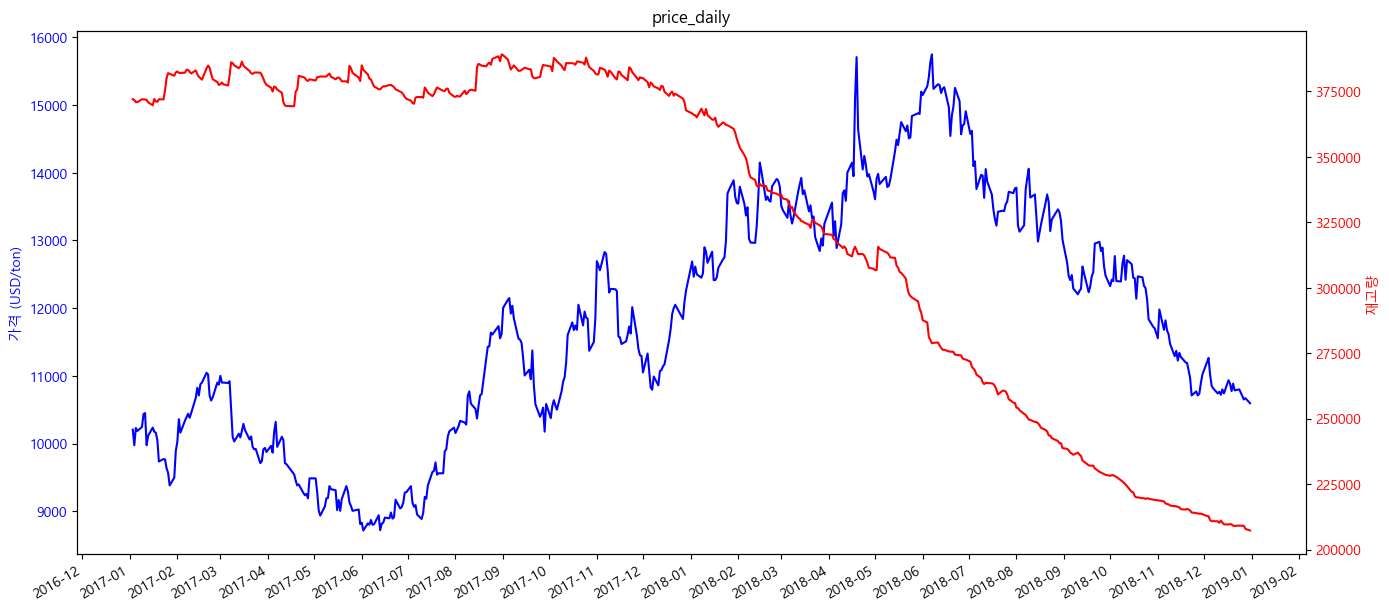

In [101]:
fig, ax1 = plt.subplots(figsize=(14, 7))

# 첫 번째 : 기준가격
ax1.plot(price_daily['기준일'], price_daily['기준가격'], label='기준가격', color='b')
ax1.set_xlabel('')
ax1.set_ylabel('가격 (USD/ton)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# 두 번째 : 재고량
ax2 = ax1.twinx()
ax2.plot(price_daily['기준일'], price_daily['재고량'], label='재고량', color='r')
ax2.set_ylabel('재고량', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('price_daily')
fig.tight_layout()

ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
fig.autofmt_xdate()

plt.show()

In [102]:
price_monthly.head()

,기준일,기준가격,등락가,등락비율,재고량
0,2017-01-01,9984.29,-1028.96,-9.34,374047
1,2017-02-01,10619.50,635.21,6.36,381745
2,2017-03-01,10230.43,-389.07,-3.66,381883
3,2017-04-01,9668.61,-561.82,-5.49,375819
4,2017-05-01,9154.29,-514.32,-5.32,380589


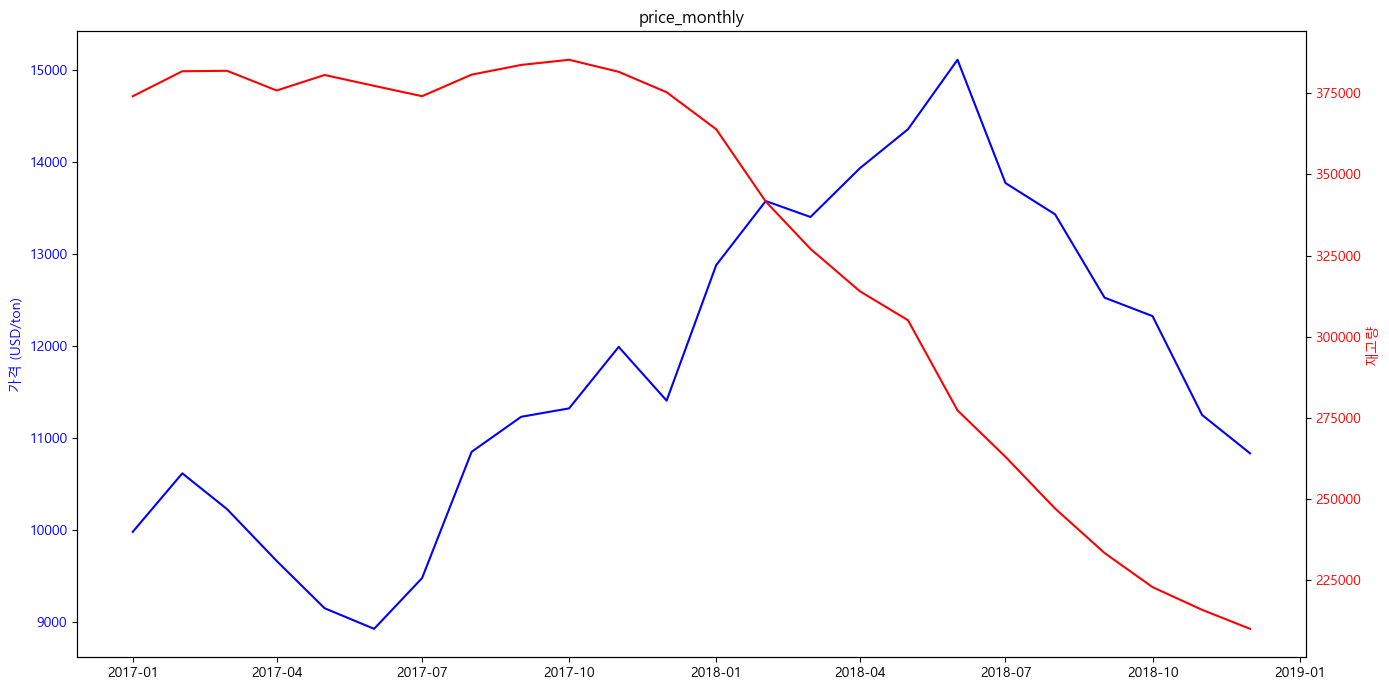

In [103]:
fig, ax1 = plt.subplots(figsize=(14, 7))

# 첫 번째 : 기준가격
ax1.plot(price_monthly['기준일'], price_monthly['기준가격'], label='기준가격', color='b')
ax1.set_xlabel('')
ax1.set_ylabel('가격 (USD/ton)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# 두 번째 : 재고량
ax2 = ax1.twinx()
ax2.plot(price_monthly['기준일'], price_monthly['재고량'], label='재고량', color='r')
ax2.set_ylabel('재고량', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('price_monthly')
fig.tight_layout()

plt.show()

### price_daily와 price_monthly의 그래프는 비슷할 수 밖에
- 가격과 재고량의 상관관계를 발견할 수 있다.
- 2018년 2월~4월을 기점으로 그래프가 교차하더니 가격은 증가하고 재고량은 감소되는 것을 볼 수 있다.
- 2018년 6월부터는 가격이 떨어지고 있지만 재고량도 같이 떨어지는 것을 볼 수 있다.
=> 2018년도 상반기에는 무슨 일이 일어났나?

## 3)가격데이터와 수급안정화지수의 데이터를 같이 봐볼까?(monthly로 봐보겠다.)

In [104]:
price_stability.head()

,기준일,수급안정화지수,전월대비 등락가,전월대비 등락율
0,201701,76.63,0.00,0.00
1,201702,78.24,0.00,0.00
2,201703,74.56,-3.68,-4.70
3,201704,77.10,2.54,3.41
4,201705,80.06,2.96,3.84


In [105]:
price_stability['기준일'] = pd.to_datetime(price_stability['기준일'], format='%Y%m').dt.strftime('%Y-%m-01')
price_stability['기준일'] = pd.to_datetime(price_stability['기준일'])

In [106]:
start_date = '2017-01-01'
end_date = '2018-12-31'

price_stability = price_stability[(price_stability['기준일'] >= start_date) & (price_stability['기준일'] <= end_date)]
price_stability.reset_index(drop=True, inplace=True)

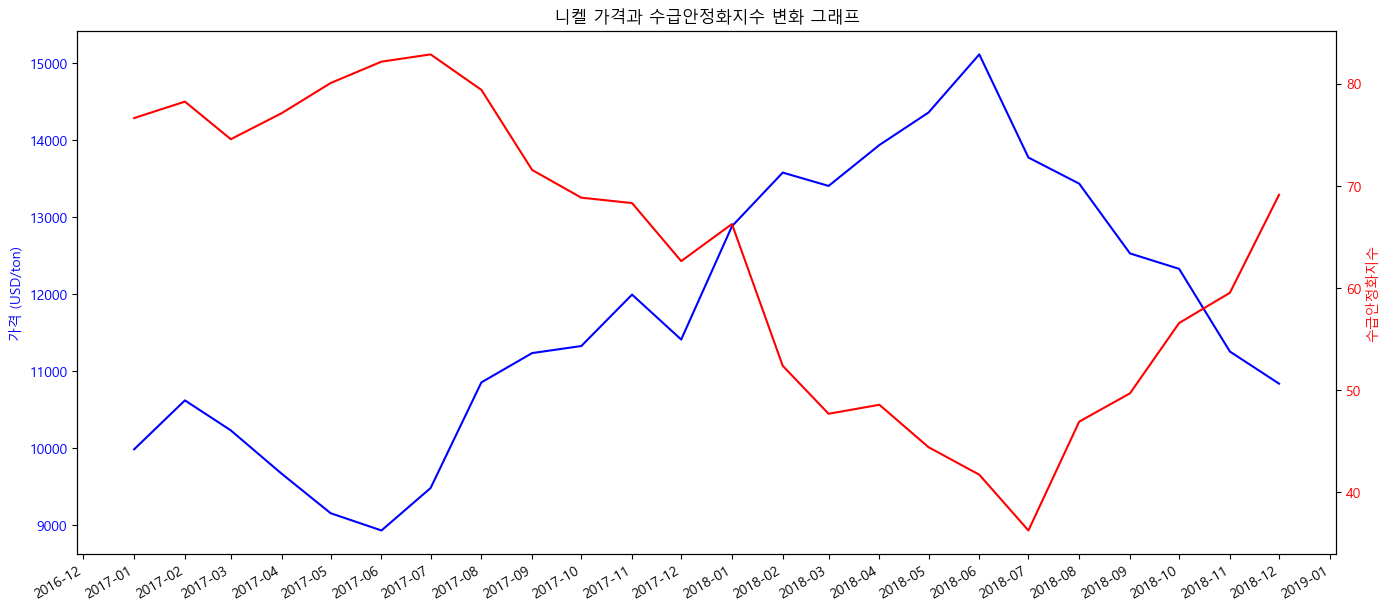

In [107]:
fig, ax1 = plt.subplots(figsize=(14, 7))

# 첫 번째 y축: 기준가격
ax1.plot(price_monthly['기준일'], price_monthly['기준가격'], label='기준가격', color='b')
ax1.set_xlabel('')
ax1.set_ylabel('가격 (USD/ton)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# 두 번째 y축: 수급안정화지수
ax2 = ax1.twinx()
ax2.plot(price_stability['기준일'], price_stability['수급안정화지수'], label='수급안정화지수', color='r')
ax2.set_ylabel('수급안정화지수', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('니켈 가격과 수급안정화지수 변화 그래프')
fig.tight_layout()


ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # 6개월 간격으로 표시
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
fig.autofmt_xdate()

plt.show()

In [108]:
## 4) 생산량과 국가별 수출 현황

In [109]:
price_output[price_output['국가'] == 'Greece']

,광종,품목,대륙,국가,단위,2011 생산량,2012 생산량,2013 생산량,2014 생산량,2015 생산량,2016 생산량,2017 생산량,2018 생산량,2019 생산량,2020 생산량,2021 생산량,2022 생산량,2023 생산량
2,니켈,mine,EUROPE,Greece,천톤,21.10,21.55,19.350,21.410,19.750,19.394,19.080,17.890,13.715,7.060,4.755,1.680,0.0
37,니켈,refined,EUROPE,Greece,천톤,18.53,18.60,16.827,18.481,17.113,17.069,16.781,15.719,11.974,6.011,4.079,1.444,0.0


In [110]:
# 품목에서 mine과 refined의 차이는 mine는 채굴된 원료이며, 보통 천연적인 상태에서 발견되고 추출된다고 한다.
# refined는 다양한 공정을 통해 가공하여 만들어진 최종 제품이라고 한다.
# 따라서 합치겠다.

In [111]:
price_output_group = price_output.groupby(['대륙','국가']).agg({
    '2017 생산량' : 'sum',
    '2018 생산량' : 'sum'
}).reset_index()

price_output_group

,대륙,국가,2017 생산량,2018 생산량
0,AFRICA,Botswana,0.000,0.000
1,AFRICA,Ivory Coast,0.576,6.852
2,AFRICA,Madagascar,70.948,66.366
3,AFRICA,Morocco,0.196,0.126
4,AFRICA,South Africa,91.451,82.730
5,AFRICA,Zambia,0.000,0.000
6,AFRICA,Zimbabwe,16.617,17.850
7,AMERICA,Brazil,137.303,130.454
8,AMERICA,Canada,369.061,323.373
9,AMERICA,Colombia,81.200,86.200


In [112]:
price_output_g_p = pd.pivot_table(price_output_group, index='대륙',values=['2017 생산량', '2018 생산량'], aggfunc='sum')
price_output_g_p

,2017 생산량,2018 생산량
대륙,,
AFRICA,179.788,173.924
AMERICA,774.097,713.356
ASIA,1951.116,2420.327
EUROPE,676.361,681.492
OCEANIA,648.108,634.033


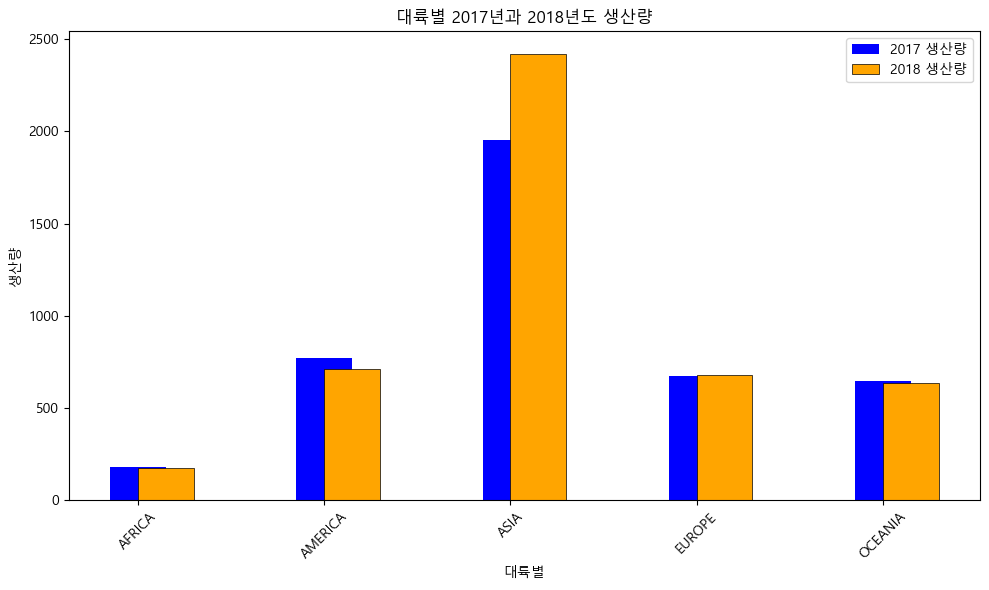

In [113]:
fig, ax = plt.subplots(figsize=(10,6))

ax.bar(price_output_g_p.index, price_output_g_p['2017 생산량'],width=0.3,label='2017 생산량', align='center', color='blue')
ax.bar(price_output_g_p.index, price_output_g_p['2018 생산량'], width=0.3, label='2018 생산량', align='edge', color='orange',edgecolor='black', linewidth=0.5)

ax.set_xlabel('대륙별')
ax.set_ylabel('생산량')
ax.set_title('대륙별 2017년과 2018년도 생산량')
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 그래프를 참고하면 AISA와 AMERICA가 순차적으로 가장 많이 생산되는 것을 볼 수 있다.

In [114]:
price_output_g_A = price_output_group[price_output_group['대륙'].isin(['AMERICA','ASIA'])]

In [115]:
price_output_g_A

,대륙,국가,2017 생산량,2018 생산량
7,AMERICA,Brazil,137.303,130.454
8,AMERICA,Canada,369.061,323.373
9,AMERICA,Colombia,81.200,86.200
10,AMERICA,Cuba,65.041,63.620
11,AMERICA,Dominican Republic,31.264,38.428
12,AMERICA,Guatemala,68.147,53.708
13,AMERICA,U.S.A.,22.081,17.573
14,AMERICA,Venezuela,0.000,0.000
15,ASIA,China,723.282,841.119
16,ASIA,India,0.092,0.077


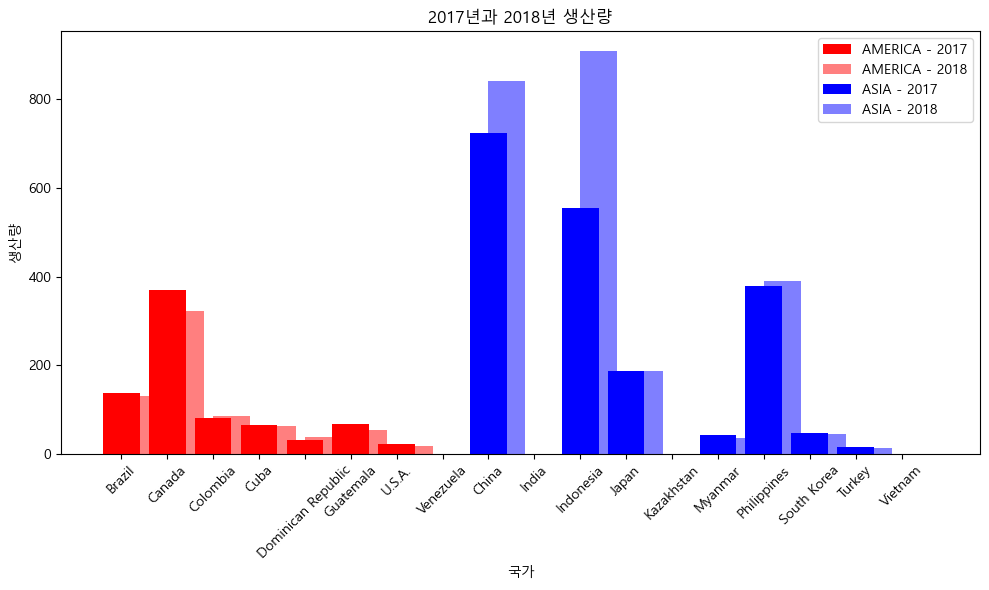

In [116]:
fig,ax = plt.subplots(figsize=(10,6))
colors = {'AMERICA' : 'red', 'ASIA': 'blue'}
for continent, group in price_output_g_A.groupby('대륙'):
    ax.bar(group['국가'], group['2017 생산량'], color=colors[continent], label=f'{continent} - 2017', align='center')
    ax.bar(group['국가'], group['2018 생산량'], color=colors[continent], alpha=0.5, label=f'{continent} - 2018', align='edge')

ax.set_xlabel('국가')
ax.set_ylabel('생산량')
ax.set_title('2017년과 2018년 생산량')
ax.legend()

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### 생산량은 중국과 인도네시아, 필리핀, 캐나다가 순차적으로 많은 것을 확인하였다.

In [ ]:
price_consumption

In [138]:
price_consumption_g = price_consumption.groupby(['대륙','국가']).agg({
    '2017 소비량' : 'sum',
    '2018 소비량' : 'sum'
}).reset_index()

price_consumption_g.head()

,대륙,국가,2017 소비량,2018 소비량
0,AFRICA,South Africa,48.825,48.885
1,AMERICA,Argentina,0.535,0.523
2,AMERICA,Brazil,22.269,22.376
3,AMERICA,Canada,6.756,6.833
4,AMERICA,Chile,0.095,0.118


In [139]:
price_consumption_g_p = pd.pivot_table(price_consumption_g, index='대륙',values=['2017 소비량', '2018 소비량'], aggfunc='sum')
price_consumption_g_p

,2017 소비량,2018 소비량
대륙,,
AFRICA,48.825,48.885
AMERICA,177.735,170.032
ASIA,1513.283,1759.448
EUROPE,349.059,359.125
OCEANIA,1.616,1.613


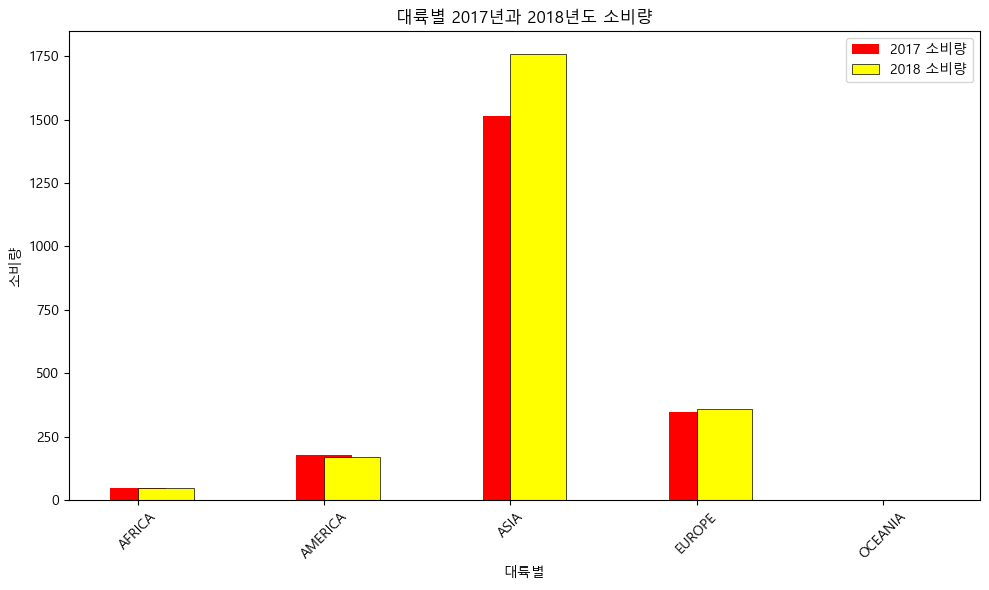

In [141]:
fig, ax = plt.subplots(figsize=(10,6))

ax.bar(price_consumption_g_p.index, price_consumption_g_p['2017 소비량'],width=0.3,label='2017 소비량', align='center', color='red')
ax.bar(price_consumption_g_p.index, price_consumption_g_p['2018 소비량'], width=0.3, label='2018 소비량', align='edge', color='yellow',edgecolor='black', linewidth=0.5)

ax.set_xlabel('대륙별')
ax.set_ylabel('소비량')
ax.set_title('대륙별 2017년과 2018년도 소비량')
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### AISA 대륙이 가장 많다!

In [142]:
price_consumption_g_A = price_consumption_g[price_consumption_g['대륙'].isin(['ASIA','EUROPE'])]
price_consumption_g_A

,대륙,국가,2017 소비량,2018 소비량
8,ASIA,China,982.018,1096.418
9,ASIA,Hong Kong,12.000,12.000
10,ASIA,India,82.140,72.073
11,ASIA,Indonesia,61.149,176.413
12,ASIA,Japan,162.777,175.156
13,ASIA,Kazakhstan,0.000,0.000
14,ASIA,Malaysia,9.000,9.000
15,ASIA,North Korea,0.480,0.536
16,ASIA,Philippines,0.254,0.940
17,ASIA,Saudi Arabia,0.167,0.276


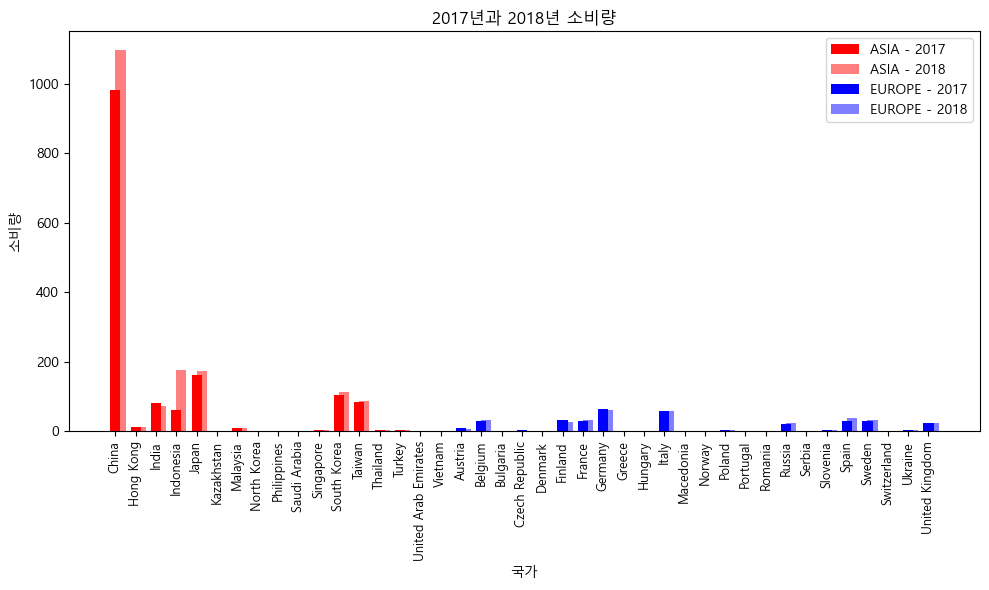

In [148]:
fig,ax = plt.subplots(figsize=(10,6))
colors = {'ASIA': 'red', 'EUROPE': 'blue'}
for continent, group in price_consumption_g_A.groupby('대륙'):
    ax.bar(group['국가'], group['2017 소비량'], color=colors[continent], width=0.5, label=f'{continent} - 2017', align='center')
    ax.bar(group['국가'], group['2018 소비량'], color=colors[continent], width=0.5, alpha=0.5, label=f'{continent} - 2018', align='edge')

ax.set_xlabel('국가')
ax.set_ylabel('소비량')
ax.set_title('2017년과 2018년 소비량')
ax.legend()

plt.xticks(rotation=90, fontsize=9)

plt.tight_layout()
plt.show()

### 소비량은 중국, 인도네시아, 일본, 한국, 대만, 독일이 많이 소비하는 것으로 나타났다.

생산량도 소비량도 아시아가 많은 것으로 나타났고, 중국, 인도네시아는 생산량 소비량이 둘다 많은 것을 알 수 있었지만, 일본과 한국은 생산량이 굉장히 적었음에도 불구하고 소비량이 많음을 알 수 있다.